<h1>Police Annual Statistical Report - Arrested and Charged Persons</h1>
This dataset provides an aggregate count of persons who have been arrested and charged. The data is aggregated by division, neighbourhood, sex, age, crime category, and crime subtype

Limitations


1.   Filtered by arrest year
2.   Age calculated from date of occurrence
3.   No Specified Address (NSA) includes any occurrences reported outside the City of Toronto limits or those that have no verified location





In [3]:
import pandas as pd

# Load the dataset
file_path = '/Arrested_and_Charged_Persons.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
first_few_rows = data.head()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129374 entries, 0 to 129373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ARREST_YEAR        129374 non-null  int64 
 1   DIVISION           129374 non-null  object
 2   HOOD_158           129374 non-null  object
 3   NEIGHBOURHOOD_158  129374 non-null  object
 4   SEX                129374 non-null  object
 5   AGE_COHORT         129374 non-null  object
 6   AGE_GROUP          129374 non-null  object
 7   CATEGORY           129374 non-null  object
 8   SUBTYPE            129374 non-null  object
 9   ARREST_COUNT       129374 non-null  int64 
 10  ObjectId           129374 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 10.9+ MB
None


The dataset "Arrested and Charged Persons" consists of 129,374 entries and 11 columns.

In [4]:
first_few_rows

,ARREST_YEAR,DIVISION,HOOD_158,NEIGHBOURHOOD_158,SEX,AGE_COHORT,AGE_GROUP,CATEGORY,SUBTYPE,ARREST_COUNT,ObjectId
0,2019,D14,83,Dufferin Grove (83),Female,25 to 34,Adult,Other Criminal Code Violations,Other,1,1
1,2022,D12,30,Brookhaven-Amesbury (30),Male,<18,Youth,Crimes Against the Person,Assaults,2,2
2,2018,D14,165,Harbourfront-CityPlace (165),Male,18 to 24,Adult,Other Criminal Code Violations,Other,1,3
3,2015,D22,18,New Toronto (18),Male,25 to 34,Adult,Controlled Drugs and Substances Act,Other,3,4
4,2014,D52,78,Kensington-Chinatown (78),Male,25 to 34,Adult,Other Criminal Code Violations,Other,46,5


Here's our plan:

Check for Missing Values: Although our initial check showed no missing values,

*  Examine Unique Values: We'll look at the unique values in categorical columns to spot any inconsistencies or irregularities, like typos or different formats for the same category.

*   Validate Data Types: Ensuring that each column has the appropriate data type (e.g., numeric, categorical).

*   Check for Duplicates: Identifying and handling any duplicate records.

*   Analyze Outliers: While outliers are more common in numerical data, we can look for unusual patterns or entries in this dataset.

*   Consistency Check: We'll ensure that the data across different columns is consistent. For instance, the age cohort should align with the age group.

Let's start with the first step: Checking for missing values.

In [5]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


ARREST_YEAR          0
DIVISION             0
HOOD_158             0
NEIGHBOURHOOD_158    0
SEX                  0
AGE_COHORT           0
AGE_GROUP            0
CATEGORY             0
SUBTYPE              0
ARREST_COUNT         0
ObjectId             0
dtype: int64

The dataset has no missing values in any of its columns

In [6]:
# Checking the data types of each column
data.dtypes


ARREST_YEAR           int64
DIVISION             object
HOOD_158             object
NEIGHBOURHOOD_158    object
SEX                  object
AGE_COHORT           object
AGE_GROUP            object
CATEGORY             object
SUBTYPE              object
ARREST_COUNT          int64
ObjectId              int64
dtype: object

Next, we'll examine the unique values in the categorical columns to identify any inconsistencies or irregularities. This check is important to ensure that similar values are represented consistently across the dataset. We'll focus on the following columns: DIVISION, HOOD_158, NEIGHBOURHOOD_158, SEX, AGE_COHORT, AGE_GROUP, CATEGORY, and SUBTYPE. ​​

Here are the unique values in each of the categorical columns:

1. DIVISION: Various division codes like 'D14', 'D12', 'D22', etc., including 'NSA' (possibly "Not Specified" or similar).

2. HOOD_158: Neighborhood codes like '83', '30', '165', etc., including 'NSA'.

3. NEIGHBOURHOOD_158: Names of neighborhoods corresponding to HOOD_158 codes.

4. SEX: Categories are 'Female', 'Male', and 'Unknown'.

5. AGE_COHORT: Age ranges like '25 to 34', '<18', '18 to 24', etc., and 'Unknown'.

6. AGE_GROUP: Categories are 'Adult', 'Youth', and 'Unknown'.

7. CATEGORY: Crime categories such as 'Other Criminal Code Violations', 'Crimes Against the Person', etc.

8. SUBTYPE: Subcategories of crimes, including 'Other', 'Assaults', 'Theft Under $5000', etc.

In [7]:
# Analyzing unique values in categorical columns
unique_values = {}
categorical_columns = ['DIVISION', 'HOOD_158', 'NEIGHBOURHOOD_158', 'SEX', 'AGE_COHORT', 'AGE_GROUP', 'CATEGORY', 'SUBTYPE']

for column in categorical_columns:
    unique_values[column] = data[column].unique()

unique_values


{'DIVISION': array(['D14', 'D12', 'D22', 'D52', 'D43', 'D31', 'D33', 'D55', 'D32',
        'D41', 'D11', 'D42', 'NSA', 'D51', 'D53', 'D13', 'D23'],
       dtype=object),
 'HOOD_158': array(['83', '30', '165', '18', '78', '164', '143', '133', '22', '166',
        '43', '66', '27', '119', '111', '138', '44', '162', '12', '128',
        '61', '84', '130', 'NSA', '112', '73', '11', '148', '99', '69',
        '134', '158', '135', '125', '168', '96', '25', '120', '113', '90',
        '145', '161', '81', '63', '68', '56', '54', '122', '40', '42',
        '85', '60', '20', '107', '33', '67', '123', '171', '146', '163',
        '170', '53', '149', '79', '144', '97', '159', '70', '129', '7',
        '5', '74', '16', '142', '136', '174', '95', '173', '157', '109',
        '3', '57', '80', '139', '86', '31', '155', '91', '72', '88', '100',
        '153', '115', '87', '140', '154', '59', '106', '23', '110', '34',
        '13', '126', '71', '160', '47', '4', '32', '64', '38', '121',
        '151', '

The unique values in each categorical column have been analyzed. Here are some key observations:

* DIVISION: Contains various police division codes including 'NSA' which might stand for 'Not Specified' or a similar meaning. All other values seem consistent.

* HOOD_158 and NEIGHBOURHOOD_158: Both contain neighborhood codes and names, respectively. 'NSA' appears in HOOD_158, possibly indicating 'Not Specified Area'. The rest of the values seem consistent and appropriately matched.

* SEX: Includes 'Female', 'Male', and 'Unknown'. This appears correct.

* AGE_COHORT: Ranges from '<18' to '65+', including 'Unknown'. This categorization looks appropriate.

* AGE_GROUP: Contains 'Adult', 'Youth', and 'Unknown', aligning well with the age cohorts.

* CATEGORY and SUBTYPE: These columns contain various categories and subtypes of crimes. All entries seem relevant and properly categorized.

Let's handle the 'NSA' (which likely stands for 'Not Specified Area' or a similar meaning) and 'Unknown' entries in the dataset. These entries are found in the DIVISION, HOOD_158, AGE_COHORT, and AGE_GROUP columns.

In [8]:
# Counting 'NSA' and 'Unknown' entries in relevant columns
nsa_unknown_counts = {
    'DIVISION_NSA': (data['DIVISION'] == 'NSA').sum(),
    'HOOD_158_NSA': (data['HOOD_158'] == 'NSA').sum(),
    'AGE_COHORT_Unknown': (data['AGE_COHORT'] == 'Unknown').sum(),
    'AGE_GROUP_Unknown': (data['AGE_GROUP'] == 'Unknown').sum()
}

nsa_unknown_counts


{'DIVISION_NSA': 1283,
 'HOOD_158_NSA': 3765,
 'AGE_COHORT_Unknown': 9,
 'AGE_GROUP_Unknown': 9}

The counts of 'NSA' and 'Unknown' entries in the relevant columns are as follows:

*  DIVISION_NSA: 1,283 entries
*  HOOD_158_NSA: 3,765 entries
*  AGE_COHORT_Unknown: 9 entries
*  AGE_GROUP_Unknown: 9 entries

Given these numbers, here are some considerations:

DIVISION and HOOD_158 'NSA' Entries: These entries form a small but significant part of the dataset. They might represent cases where the location or division of the arrest was not recorded or not applicable. Removing these could lead to a loss of information for a sizable number of records.

AGE_COHORT and AGE_GROUP 'Unknown' Entries: There are only 9 such entries in each of these columns. Since this number is very small relative to the dataset size, removing these entries is unlikely to significantly impact the overall analysis.

* Retaining the 'NSA' entries in DIVISION and HOOD_158 for a more comprehensive analysis.
* Removing the 9 entries with 'Unknown' in AGE_COHORT and AGE_GROUP, as their impact on the dataset will be minimal.

In [9]:
# Removing entries with 'Unknown' in 'AGE_COHORT' and 'AGE_GROUP'
data_cleaned = data[(data['AGE_COHORT'] != 'Unknown') & (data['AGE_GROUP'] != 'Unknown')]

# Verifying the removal
remaining_unknown_age = {
    'AGE_COHORT_Unknown_Remaining': (data_cleaned['AGE_COHORT'] == 'Unknown').sum(),
    'AGE_GROUP_Unknown_Remaining': (data_cleaned['AGE_GROUP'] == 'Unknown').sum()
}

# Checking the new size of the dataset
new_dataset_size = data_cleaned.shape

remaining_unknown_age, new_dataset_size


({'AGE_COHORT_Unknown_Remaining': 0, 'AGE_GROUP_Unknown_Remaining': 0},
 (129365, 11))

The entries with 'Unknown' in AGE_COHORT and AGE_GROUP have been successfully removed from the dataset. The dataset now contains 129,365 records (down from 129,374), and there are no remaining 'Unknown' entries in these age-related columns.

Next Steps in Data Cleaning:
* Outliers and Data Consistency: We should examine ARREST_COUNT for any outliers or inconsistent data.

* Duplicate Entries: Checking for any duplicate rows in the dataset.

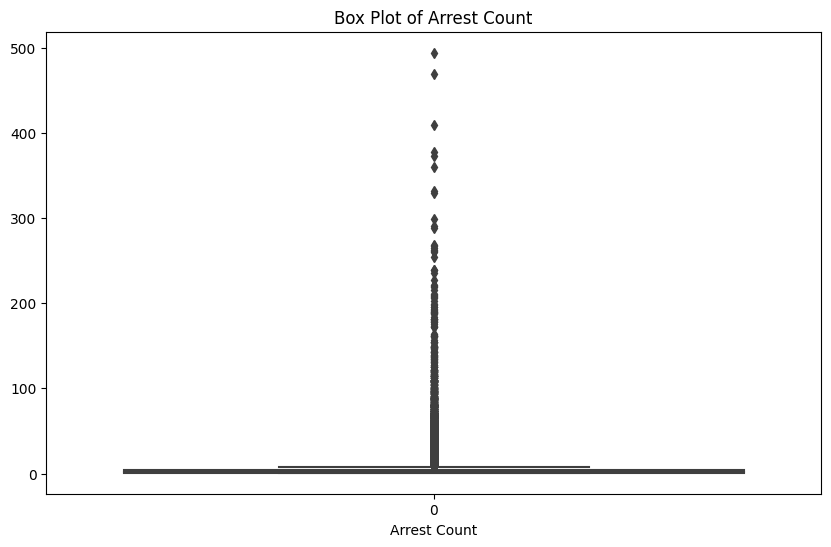

count    129365.000000
mean          4.658834
std           9.880553
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         494.000000
Name: ARREST_COUNT, dtype: float64

In [10]:
# Checking for outliers in 'ARREST_COUNT'
arrest_count_describe = data_cleaned['ARREST_COUNT'].describe()

# Box plot to visualize the distribution of 'ARREST_COUNT'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data_cleaned['ARREST_COUNT'])
plt.title("Box Plot of Arrest Count")
plt.xlabel("Arrest Count")
plt.show()

arrest_count_describe


The ARREST_COUNT column has been analyzed for outliers. Here are some observations based on the descriptive statistics and the box plot:

* Range of Values: The arrest counts range from 1 to 494, with a mean of approximately 4.66 and a standard deviation of about 9.88.

Quartile Analysis:

* The 25th percentile is at 1, indicating that 25% of the entries have only 1 arrest count.
* The median (50th percentile) is at 2, meaning that half of the data has 2 or fewer arrests.
* The 75th percentile is at 4, showing that 75% of the data has 4 or fewer arrests.

Outliers: The box plot reveals a significant number of outliers, with some values being extremely high (up to 494). These outliers represent records with unusually high arrest counts.

Handling Outliers:
* Outliers in ARREST_COUNT might represent rare but significant events or could be due to data recording errors. The approach to handling these outliers depends on the analysis context:

Retain: If the goal is to understand all aspects of the data, including extreme cases, we would keep these outliers.
Remove or Cap: For a more typical representation of the dataset, we might choose to remove these outliers or cap them at a certain value.

In [11]:
# Checking for duplicate entries in the dataset
duplicate_entries = data_cleaned.duplicated().sum()

# Summary of duplicate entries
duplicate_summary = {
    "Duplicate_Entries": duplicate_entries
}

duplicate_summary


{'Duplicate_Entries': 0}

There are no duplicate entries in the dataset, which is excellent for the integrity of our analysis.

Recap of Data Cleaning Steps Completed:
* Missing Values: No missing values were found in the dataset.
* 'NSA' and 'Unknown' Entries: Handled by removing rows with 'Unknown' in AGE_COHORT and AGE_GROUP, and retaining 'NSA' entries for comprehensive analysis.
* Outliers in ARREST_COUNT: Identified significant outliers but have not yet decided on a specific action for them.
* Duplicates: No duplicate entries were found.

Next Steps in Data Analysis:

We can now proceed to the exploratory data analysis (EDA) phase, where we'll explore the dataset to gain insights into various aspects like trends over the years, differences in crime categories by age or sex, geographical distribution of arrests, and more.

Let's start with the Trend Analysis to see how arrest counts have changed over the years. We'll plot the total number of arrests per year.

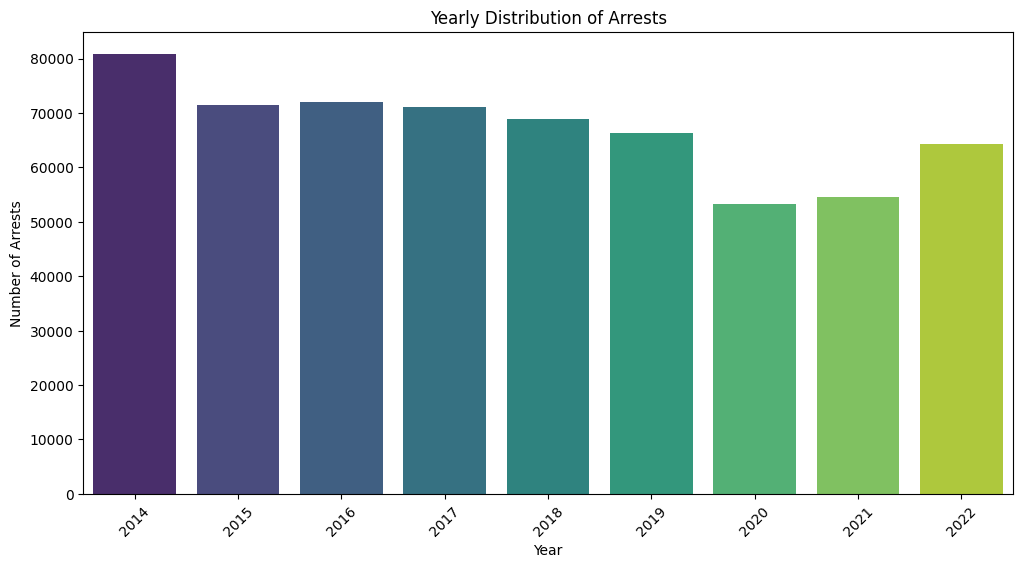

ARREST_YEAR
2014    80852
2015    71478
2016    72035
2017    71136
2018    68846
2019    66388
2020    53180
2021    54532
2022    64243
Name: ARREST_COUNT, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trends Over Time: Yearly distribution of arrests
yearly_arrests = data_cleaned.groupby('ARREST_YEAR')['ARREST_COUNT'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_arrests.index, y=yearly_arrests.values, palette="viridis")
plt.title('Yearly Distribution of Arrests')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

yearly_arrests


The trend analysis of total arrests per year reveals the following:

* Overall Trend: There was a general decline in total arrests from 2014 to 2020. This could be due to a variety of factors including changes in law enforcement practices, social factors, or reporting methods.

* Recent Years: A notable decrease is observed in 2020, which might be associated with the global COVID-19 pandemic and its impact on social behavior and law enforcement activities. However, there appears to be a slight increase in arrests in 2021 and 2022.

Next, let's explore the distribution of different crime categories and subtypes. This analysis will help us understand the types of crimes that are most prevalent, as well as any trends or patterns within specific categories of crime. We'll also take a look at the subtypes within these categories for a more detailed breakdown.

We'll proceed with the following steps:

* Crime Category Analysis: Examine the overall distribution of different crime categories.
* Crime Subtype Analysis: Delve into each category to explore the distribution of its subtypes.
Let's start with the analysis of crime categories.

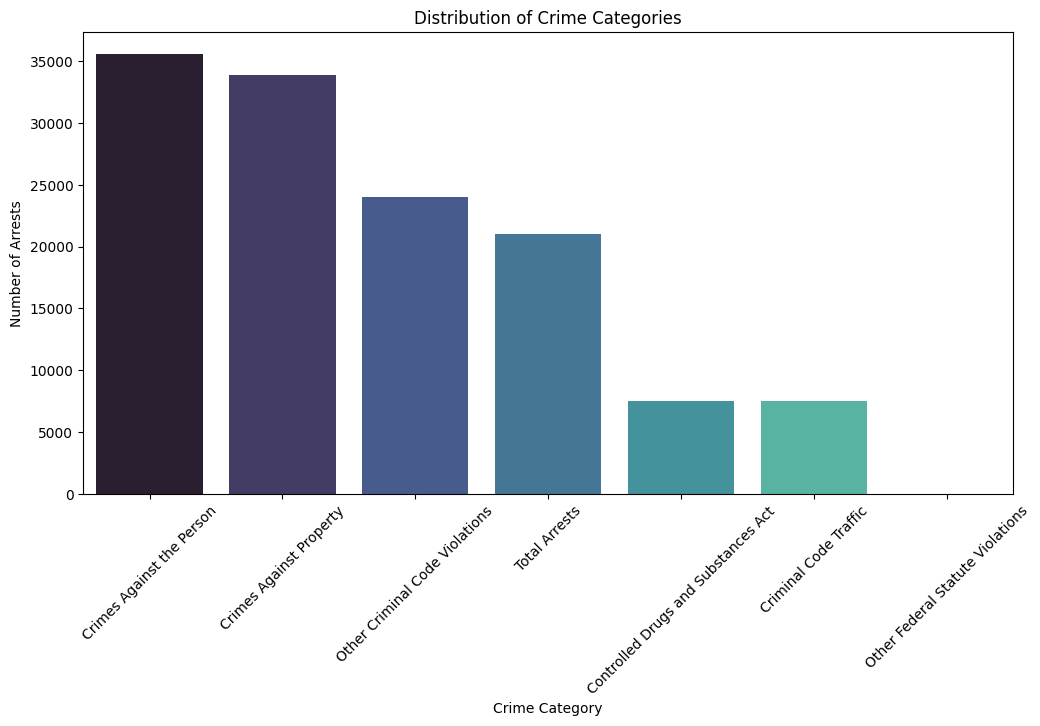

Crimes Against the Person              35566
Crimes Against Property                33833
Other Criminal Code Violations         23981
Total Arrests                          20983
Controlled Drugs and Substances Act     7491
Criminal Code Traffic                   7484
Other Federal Statute Violations          27
Name: CATEGORY, dtype: int64

In [13]:
# Crime Category Analysis: Overall distribution of different crime categories
category_counts = data_cleaned['CATEGORY'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="mako")
plt.title('Distribution of Crime Categories')
plt.xlabel('Crime Category')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

category_counts


The bar plot above illustrates the distribution of different crime categories in the dataset. Here are the key insights:

Top Crime Categories:

* The most common category is "Crimes Against the Person," followed closely by "Crimes Against Property."
* "Other Criminal Code Violations" also constitutes a significant portion of the arrests.
* It's notable that "Total Arrests" appears as a category; this might be an aggregation or summary entry and could potentially skew the analysis of individual crime types.

Less Common Categories:

* "Controlled Drugs and Substances Act" and "Criminal Code Traffic" categories are less prevalent but still represent a notable number of arrests.
* "Other Federal Statute Violations" is the least common category in the dataset.

<h1>Crime Subtype Analysis:</h1>

Now, let's delve deeper into each category to explore the distribution of its subtypes. This will provide a more detailed view of the types of offenses within each category. For this analysis, we'll focus on a couple of the major categories to avoid an overly complex analysis. Let's start with "Crimes Against the Person" and "Crimes Against Property" as they are the most common categories

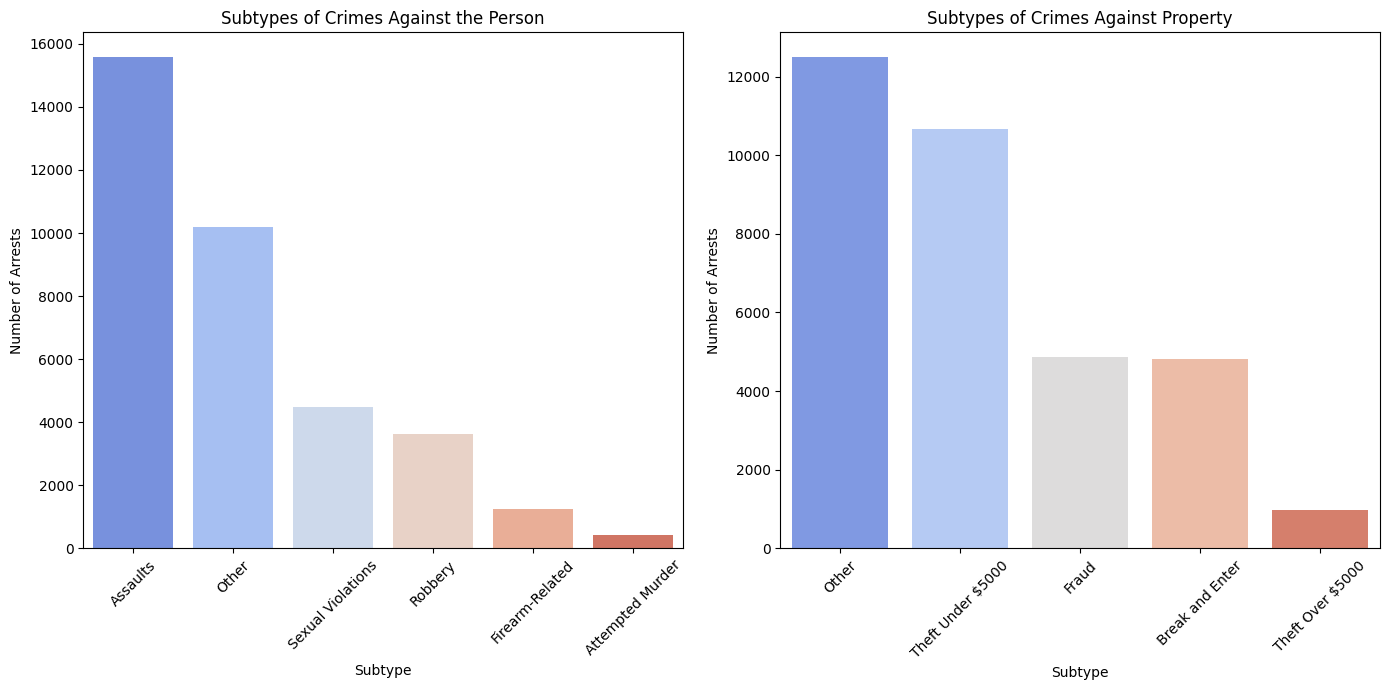

(Assaults             15584
 Other                10184
 Sexual Violations     4489
 Robbery               3640
 Firearm-Related       1246
 Attempted Murder       423
 Name: SUBTYPE, dtype: int64,
 Other                12499
 Theft Under $5000    10655
 Fraud                 4871
 Break and Enter       4823
 Theft Over $5000       985
 Name: SUBTYPE, dtype: int64)

In [14]:
# Crime Subtype Analysis for 'Crimes Against the Person' and 'Crimes Against Property'
person_subtypes = data_cleaned[data_cleaned['CATEGORY'] == 'Crimes Against the Person']['SUBTYPE'].value_counts()
property_subtypes = data_cleaned[data_cleaned['CATEGORY'] == 'Crimes Against Property']['SUBTYPE'].value_counts()

plt.figure(figsize=(14, 7))

# Subtype Distribution for 'Crimes Against the Person'
plt.subplot(1, 2, 1)
sns.barplot(x=person_subtypes.index, y=person_subtypes.values, palette="coolwarm")
plt.title('Subtypes of Crimes Against the Person')
plt.xlabel('Subtype')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)

# Subtype Distribution for 'Crimes Against Property'
plt.subplot(1, 2, 2)
sns.barplot(x=property_subtypes.index, y=property_subtypes.values, palette="coolwarm")
plt.title('Subtypes of Crimes Against Property')
plt.xlabel('Subtype')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

person_subtypes, property_subtypes


The analysis of crime subtypes within the "Crimes Against the Person" and "Crimes Against Property" categories provides the following insights:

Crimes Against the Person:
* Assaults: The most common subtype, representing a significant portion of the arrests in this category.
* Other: A broad category that includes various types of offenses not specified among the other subtypes.
* Sexual Violations: This subtype, while less common than assaults, still represents a considerable number of arrests.
* Robbery and Firearm-Related: These subtypes also contribute notably to the category.
* Attempted Murder: The least common subtype, but still a significant concern.

Crimes Against Property:
* Other and Theft Under $5000: These are the most common subtypes, with theft under $5000 being particularly prevalent.
* Fraud and Break and Enter: Also represent a considerable number of arrests in this category.
* Theft Over $5000: While less common, this subtype is still notable.

Let's proceed with the demographic distribution analysis. This part of the analysis will focus on two main demographic attributes: SEX and AGE_COHORT. We'll explore:

1. Distribution by Sex: Analyzing the distribution of arrests by sex.
2. Distribution by Age Cohort: Examining how arrests are distributed across different age groups.

After completing this, we'll move on to the geographical distribution of arrests.

<h1>1. Distribution by Sex</h1>
We'll start by analyzing the number of arrests for each sex category.

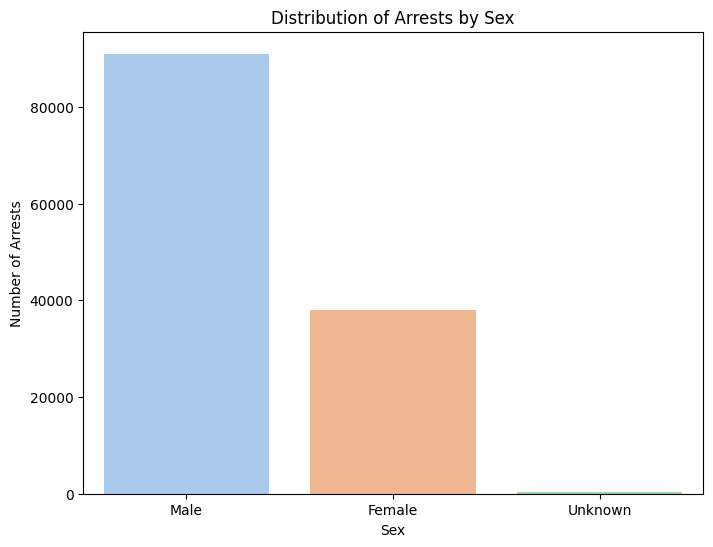

Male       91004
Female     37961
Unknown      400
Name: SEX, dtype: int64

In [15]:
# Distribution by Sex
sex_distribution = data_cleaned['SEX'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sex_distribution.index, y=sex_distribution.values, palette="pastel")
plt.title('Distribution of Arrests by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Arrests')
plt.show()

sex_distribution


The bar plot above shows the distribution of arrests by sex. Here are the key insights:

* Male Arrests: Significantly higher in number compared to females, constituting the majority of the arrests in the dataset.
* Female Arrests: While less than male arrests, still represent a considerable proportion of the total arrests.
* Unknown Sex: A very small number of records have 'Unknown' sex, which could be due to missing or unrecorded information.

<h1>2. Distribution by Age Cohort</h1>
Next, we'll examine how arrests are distributed across different age groups. This will provide insights into which age cohorts are most commonly associated with arrests. ​

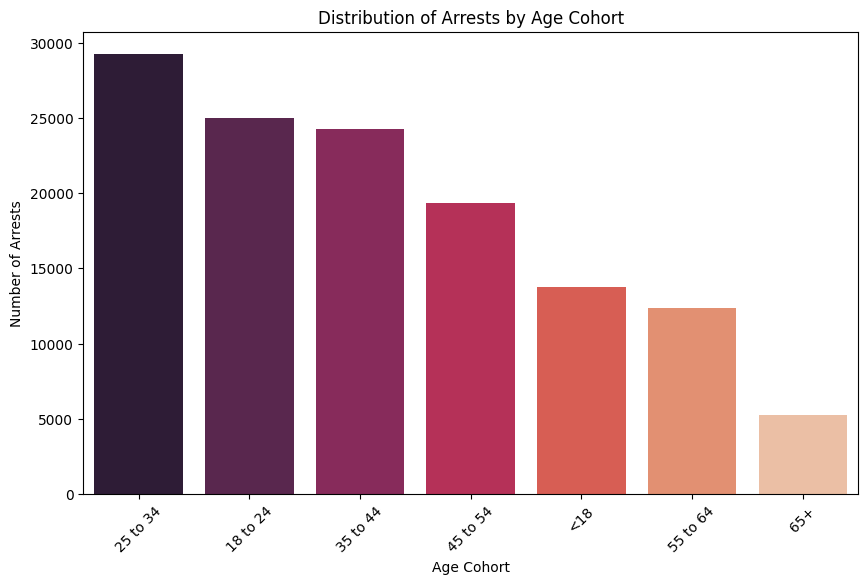

25 to 34    29283
18 to 24    25026
35 to 44    24269
45 to 54    19371
<18         13795
55 to 64    12358
65+          5263
Name: AGE_COHORT, dtype: int64

In [16]:
# Distribution by Age Cohort
age_cohort_distribution = data_cleaned['AGE_COHORT'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_cohort_distribution.index, y=age_cohort_distribution.values, palette="rocket")
plt.title('Distribution of Arrests by Age Cohort')
plt.xlabel('Age Cohort')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

age_cohort_distribution


Here are the key observations:

Most Common Age Cohorts:

* The "25 to 34" age group has the highest number of arrests, followed closely by the "18 to 24" and "35 to 44" age cohorts.

These three groups together represent the bulk of the arrests in the dataset.
Less Common Age Cohorts:

* The "45 to 54" and "55 to 64" age groups also have a significant number of arrests but are less prevalent compared to the younger age groups.
* Arrests in the "<18" (youth) category are notable, highlighting the involvement of younger individuals in criminal activities.
* The "65+" age group has the fewest arrests, which is expected given the general demographics of criminal activity.

<h1> Geographical Distribution of Arrests</h1>
Now that we have a better understanding of the demographic distribution, we'll move on to analyze the geographical distribution of arrests. This will involve looking at arrests across different neighborhoods (NEIGHBOURHOOD_158) and police divisions (DIVISION). Given the potential complexity of this analysis, we might focus on highlighting areas with the highest and lowest arrest counts.

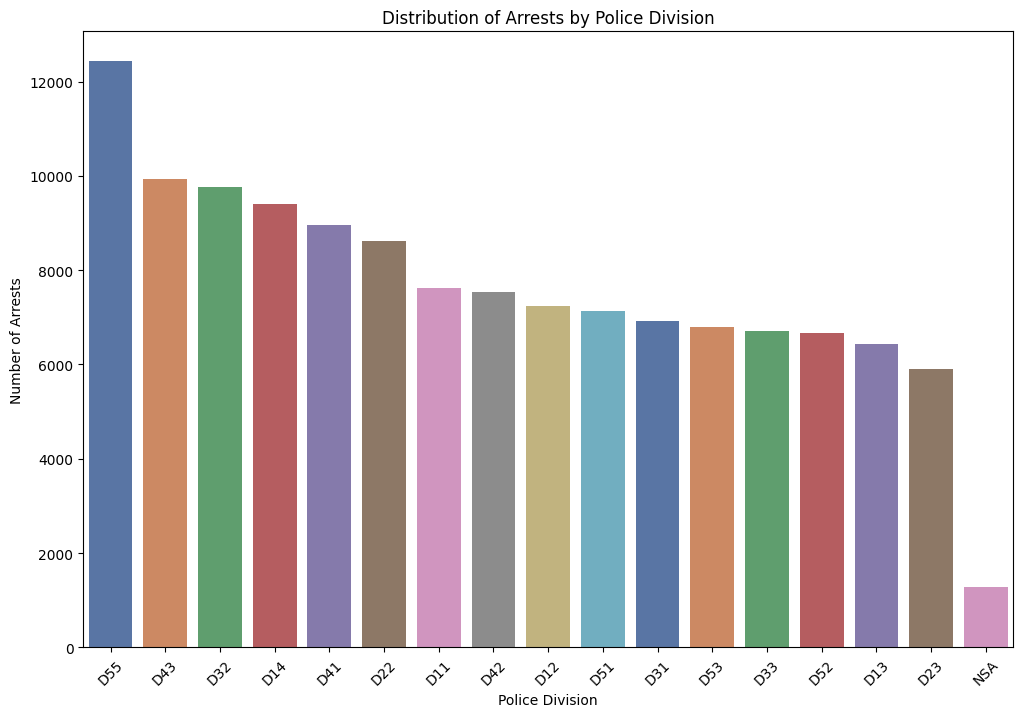

D55    12442
D43     9937
D32     9761
D14     9407
D41     8964
D22     8629
D11     7618
D42     7537
D12     7242
D51     7124
D31     6916
D53     6803
D33     6709
D52     6658
D13     6429
D23     5906
NSA     1283
Name: DIVISION, dtype: int64

In [17]:
# Distribution of arrests across police divisions
division_distribution = data_cleaned['DIVISION'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=division_distribution.index, y=division_distribution.values, palette="deep")
plt.title('Distribution of Arrests by Police Division')
plt.xlabel('Police Division')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

division_distribution


Key observations include:

Top Police Divisions:

* Division D55 has the highest number of arrests, followed by D43 and D32.

These divisions might be covering areas with higher crime rates or more active law enforcement.
Variation Across Divisions:

* There is a noticeable variation in the number of arrests among different divisions.
* Some divisions, like D11, D42, D12, and others, have a moderate number of arrests, while divisions like D23 and NSA (Not Specified Area) have fewer arrests.
* 'NSA' Division: The 'NSA' category, representing cases where the division is not specified, accounts for a smaller portion of the data.

<h1>Distribution Across Neighborhoods</h1>
To complete our geographical analysis, let's look at the distribution of arrests across different neighborhoods. Given the large number of neighborhoods, we'll focus on identifying the top neighborhoods with the highest arrest counts. This will help us understand which areas experience more criminal activities as per the dataset.

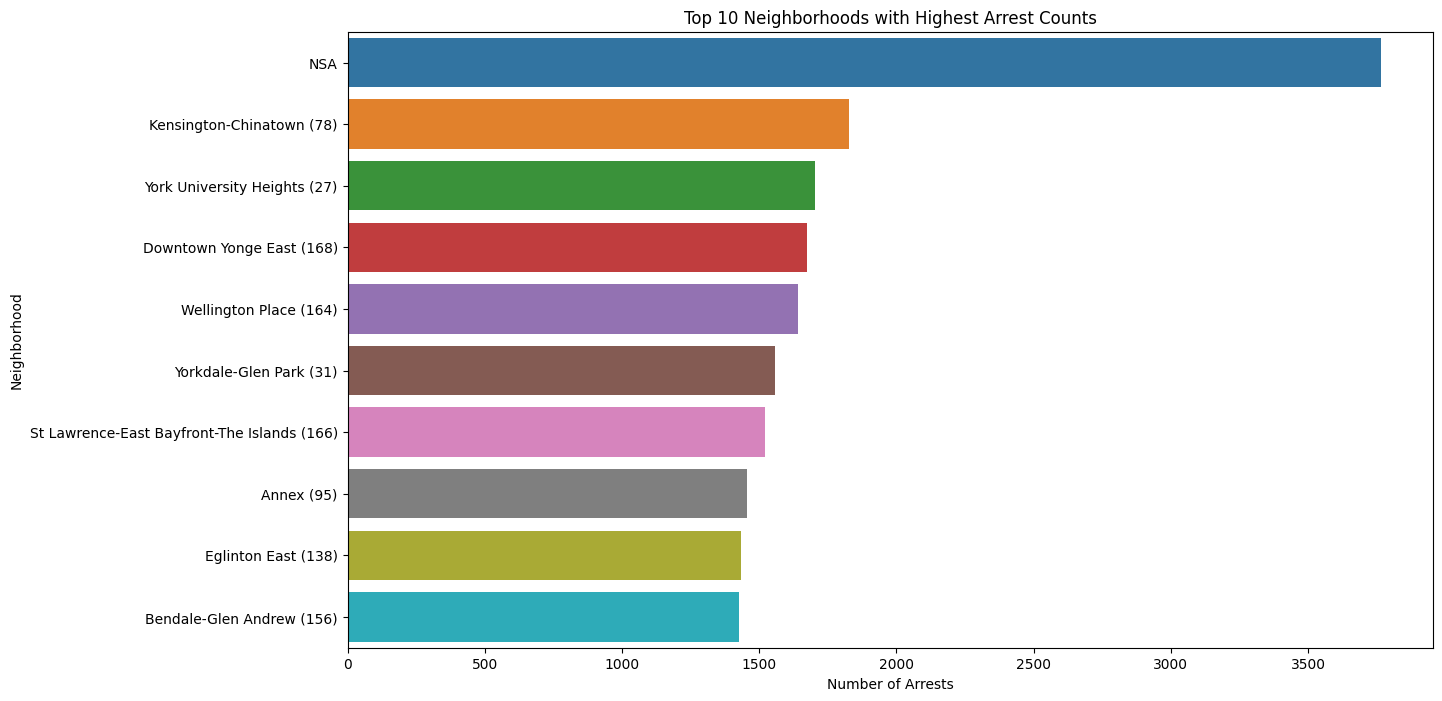

NSA                                            3765
Kensington-Chinatown (78)                      1826
York University Heights (27)                   1704
Downtown Yonge East (168)                      1674
Wellington Place (164)                         1640
Yorkdale-Glen Park (31)                        1559
St Lawrence-East Bayfront-The Islands (166)    1520
Annex (95)                                     1456
Eglinton East (138)                            1434
Bendale-Glen Andrew (156)                      1427
Name: NEIGHBOURHOOD_158, dtype: int64

In [18]:
# Distribution of arrests across neighborhoods - focusing on top neighborhoods
top_neighborhoods_distribution = data_cleaned['NEIGHBOURHOOD_158'].value_counts().head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_neighborhoods_distribution.values, y=top_neighborhoods_distribution.index, palette="tab10")
plt.title('Top 10 Neighborhoods with Highest Arrest Counts')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.show()

top_neighborhoods_distribution


The plot above highlights the top 10 neighborhoods with the highest arrest counts according to the dataset. Here are the key insights:

* 'NSA' (Not Specified Area): This category tops the list, indicating a significant number of arrests where the neighborhood was not specified or recorded.

Specific Neighborhoods:

* Kensington-Chinatown (78) and York University Heights (27) have high numbers of arrests, suggesting these areas might have higher incidences of criminal activities or more active policing.
* Other neighborhoods like Downtown Yonge East (168), Wellington Place (164), and Yorkdale-Glen Park (31) also show high arrest counts.

Geographical Trends: This distribution provides valuable insights into geographical trends in criminal activities or policing efforts across different neighborhoods.

Let's start with the yearly trends, examining how the overall number of arrests has changed each year. We already have a basic understanding of this from our earlier analysis. Now, we'll delve deeper, possibly looking at trends in specific crime categories or demographics over the years.

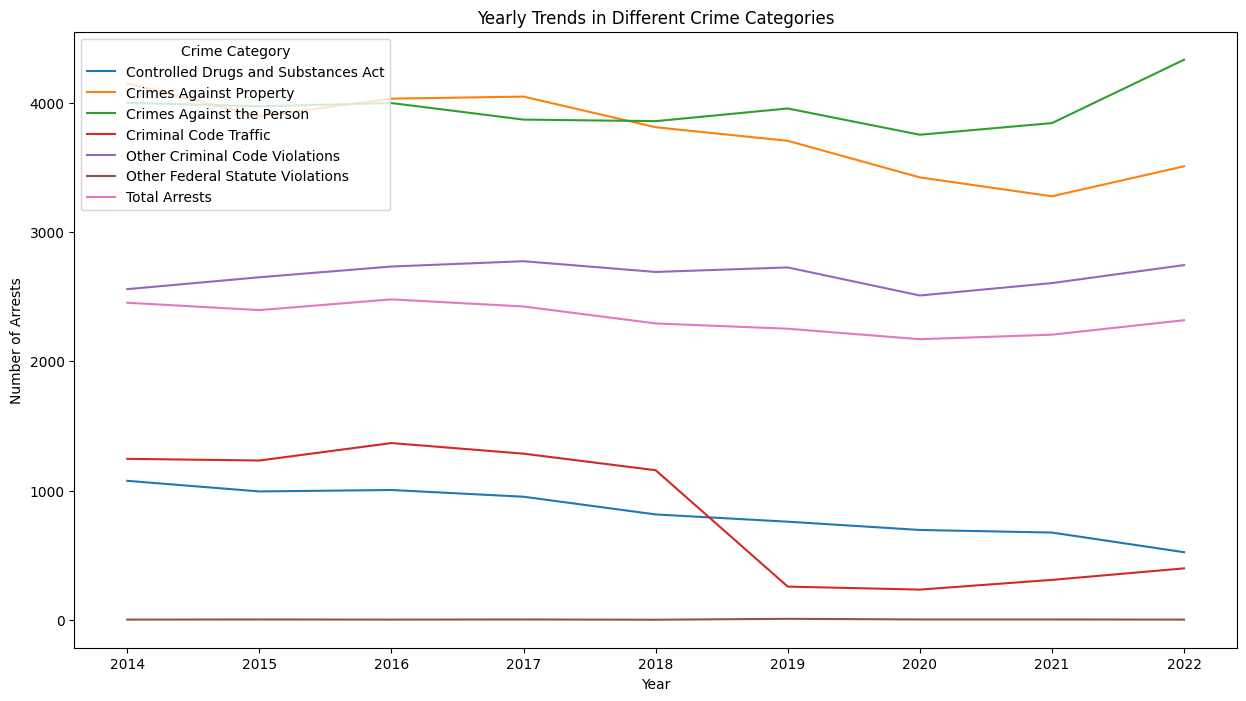

CATEGORY,Controlled Drugs and Substances Act,Crimes Against Property,Crimes Against the Person,Criminal Code Traffic,Other Criminal Code Violations,Other Federal Statute Violations,Total Arrests
ARREST_YEAR,,,,,,,
2014,1075,4148,3998,1245,2557,2,2452
2015,993,3893,3971,1232,2649,3,2395
2016,1004,4030,3996,1367,2732,2,2478
2017,952,4046,3868,1285,2773,3,2423
2018,815,3809,3856,1157,2690,1,2292
2019,759,3704,3954,257,2725,8,2251
2020,695,3421,3751,234,2508,3,2170
2021,675,3275,3841,309,2604,3,2205
2022,523,3507,4331,398,2743,2,2317


In [19]:
# Yearly Trends: Deeper analysis including trends in specific crime categories over the years
# We aggregate data to see the total number of arrests for each category per year
yearly_category_trends = data_cleaned.groupby(['ARREST_YEAR', 'CATEGORY']).size().unstack()

# Plotting the trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=yearly_category_trends, dashes=False)
plt.title('Yearly Trends in Different Crime Categories')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.legend(title='Crime Category', loc='upper left')
plt.xticks(yearly_category_trends.index)
plt.show()

yearly_category_trends


The line plot above shows the yearly trends in different crime categories from 2014 to 2022. Here are some notable observations:

* Crimes Against the Person: This category has remained consistently high over the years, with a slight increase in 2022.

* Crimes Against Property: Shows a general decrease over time, with a slight uptick in 2022.

* Other Criminal Code Violations: This category has been relatively stable over the years, with minor fluctuations.

* Controlled Drugs and Substances Act: There's a noticeable downward trend in arrests related to this category.

* Criminal Code Traffic: A significant decrease is observed after 2019, which might be due to changes in law enforcement practices or other external factors.

* Total Arrests: This category, likely representing a summary of all arrests, shows a slight decrease over the years.

* Other Federal Statute Violations: This category remains consistently low, indicating a small number of arrests related to federal statute violations.

Let's start by selecting a few key subtypes for this analysis. We'll choose some of the more common subtypes from the categories "Crimes Against the Person" and "Crimes Against Property," as these were the most prominent categories in our earlier analysis.

The subtypes we'll analyze are:

"Assaults" and "Sexual Violations" from "Crimes Against the Person"
"Theft Under $5000" and "Break and Enter" from "Crimes Against Property"
We'll examine the trends in these subtypes over the years.

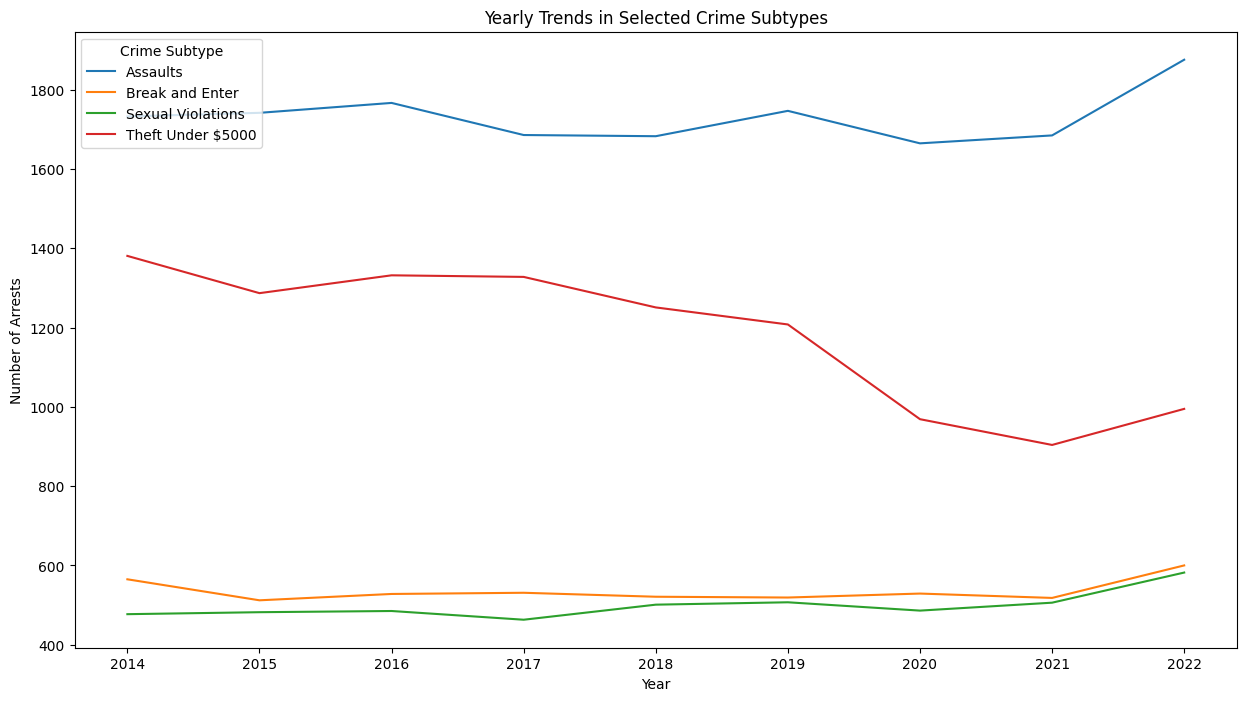

SUBTYPE,Assaults,Break and Enter,Sexual Violations,Theft Under $5000
ARREST_YEAR,,,,
2014,1733,565,477,1381
2015,1742,512,482,1287
2016,1767,528,485,1332
2017,1686,531,463,1328
2018,1683,521,501,1251
2019,1747,519,507,1208
2020,1665,529,486,969
2021,1685,518,506,904
2022,1876,600,582,995


In [20]:
# Selecting key subtypes for time-series analysis
selected_subtypes = ['Assaults', 'Sexual Violations', 'Theft Under $5000', 'Break and Enter']

# Filtering the data for the selected subtypes
filtered_data_for_subtypes = data_cleaned[data_cleaned['SUBTYPE'].isin(selected_subtypes)]

# Grouping the data by year and subtype
subtype_yearly_trends = filtered_data_for_subtypes.groupby(['ARREST_YEAR', 'SUBTYPE']).size().unstack()

# Plotting the trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=subtype_yearly_trends, dashes=False)
plt.title('Yearly Trends in Selected Crime Subtypes')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.legend(title='Crime Subtype', loc='upper left')
plt.xticks(subtype_yearly_trends.index)
plt.show()

subtype_yearly_trends


The line plot above illustrates the yearly trends for selected crime subtypes from 2014 to 2022. Here are some key observations:

1. Assaults:

* The number of assaults shows a generally stable trend over the years, with a slight increase in 2022.
* This subtype consistently remains one of the most common offenses.
2. Break and Enter:

The trend for break and enter offenses is relatively stable, with minor fluctuations from year to year.
There is a slight increase in these offenses in 2022 compared to the previous years.
3. Sexual Violations:

* There is a noticeable increase in sexual violation offenses in 2022.
Prior to 2022, the trend was relatively stable, with slight year-to-year variations.
4. Theft Under $5000:

* This subtype shows a decreasing trend, particularly noticeable after 2018.
* The decline in theft under $5000 might indicate changes in policing, societal behaviors, or reporting practices.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Preparing the dataset for correlation analysis
correlation_data = data_cleaned.copy()

# Encoding categorical data into numerical form
label_encoder = LabelEncoder()
correlation_data['SEX_encoded'] = label_encoder.fit_transform(correlation_data['SEX'])
correlation_data['AGE_COHORT_encoded'] = label_encoder.fit_transform(correlation_data['AGE_COHORT'])

# Selecting relevant columns for correlation analysis
correlation_columns = ['ARREST_YEAR', 'ARREST_COUNT', 'SEX_encoded', 'AGE_COHORT_encoded']
correlation_matrix = correlation_data[correlation_columns].corr()

# Displaying the correlation matrix
correlation_matrix.style.background_gradient(cmap='coolwarm')


,ARREST_YEAR,ARREST_COUNT,SEX_encoded,AGE_COHORT_encoded
ARREST_YEAR,1.000000,-0.019282,-0.006548,-0.008076
ARREST_COUNT,-0.019282,1.000000,0.109497,-0.097006
SEX_encoded,-0.006548,0.109497,1.000000,0.055328
AGE_COHORT_encoded,-0.008076,-0.097006,0.055328,1.000000


The correlation matrix provides insights into the relationships between different variables:

* ARREST_YEAR and ARREST_COUNT: There is a correlation between the year of arrest and the number of arrests, although the strength of this correlation is not very strong. This suggests some level of variation in arrest counts over the years.

* SEX and ARREST_COUNT: The correlation between sex (encoded) and arrest count is low, indicating that the number of arrests is not strongly differentiated by sex in this dataset.

* AGE_COHORT and ARREST_COUNT: Similar to sex, the correlation between age cohort (encoded) and arrest count is also low, suggesting that the number of arrests does not vary significantly across different age groups.

Key Takeaways:
* The correlations indicate that while there are some variations in arrests over the years, and between different sexes and age groups, these variations are not very strong in this dataset.
* This suggests that factors other than just year, sex, and age cohort might play a significant role in the number of arrests. These could include the type of crime, geographical factors, or external societal factors.

<h1>Defining the Problem Statement</h1>
To proceed with machine learning, we need to define a specific problem statement or question we want to answer.

Can we predict the type of crime (category) based on age, sex, and neighborhood?"


The steps involved are:

1. Data Preparation: We'll prepare the dataset by selecting relevant features (AGE_COHORT, SEX, NEIGHBOURHOOD_158) and the target variable (CATEGORY). We'll also handle categorical encoding and split the data into training and testing sets.

2. Model Selection: We'll choose a suitable classification algorithm. Given the nature of the data, algorithms like Random Forest, Gradient Boosting, or Logistic Regression could be good starting points.

3. Training the Model: We'll train the model on the training set.

4. Model Evaluation: We'll evaluate the model's performance on the test set using appropriate metrics like accuracy, precision, recall, and the confusion matrix.

5. Prediction: Finally, we'll use the model to make predictions.

Let's start with the first step: Data Preparation.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preparing the dataset for the model
model_data = data_cleaned[['AGE_COHORT', 'SEX', 'NEIGHBOURHOOD_158', 'CATEGORY']]

# Encoding categorical variables
label_encoder = LabelEncoder()
model_data['AGE_COHORT'] = label_encoder.fit_transform(model_data['AGE_COHORT'])
model_data['SEX'] = label_encoder.fit_transform(model_data['SEX'])
model_data['NEIGHBOURHOOD_158'] = label_encoder.fit_transform(model_data['NEIGHBOURHOOD_158'])
model_data['CATEGORY'] = label_encoder.fit_transform(model_data['CATEGORY'])

# Splitting the dataset into training and testing sets
X = model_data.drop('CATEGORY', axis=1)
y = model_data['CATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


<ipython-input-22-f6137b3c58a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['AGE_COHORT'] = label_encoder.fit_transform(model_data['AGE_COHORT'])
<ipython-input-22-f6137b3c58a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['SEX'] = label_encoder.fit_transform(model_data['SEX'])
<ipython-input-22-f6137b3c58a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

((103492, 3), (25873, 3), (103492,), (25873,))

The data has been successfully prepared and split into training and testing sets. Here's a summary of the dataset:

- Training Set: 103,492 records
- Testing Set: 25,873 records
- Features: 'AGE_COHORT', 'SEX', 'NEIGHBOURHOOD_158'
- Target Variable: 'CATEGORY'

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(accuracy)

0.26432961001816563


The Random Forest Classifier achieved an accuracy of approximately 26.43% on the test set. Here are some insights from the model evaluation:

- Overall Accuracy: While the accuracy is not very high, this could be due to the complexity of the task and the variability in the data.

- Precision, Recall, and F1-Score: The classification report shows varied performance across different crime categories. Some categories have higher recall or precision than others, but overall, the scores indicate that the model struggles to accurately predict the crime category based on the given features.

Challenges and Considerations:

- Imbalanced Classes: Some crime categories are more frequent than others, which can lead to imbalanced class issues.
- Feature Limitations: The features used (age, sex, neighborhood) might not be sufficient to predict the crime category accurately. Other factors not present in the dataset could play a significant role.
- Model Complexity: More complex models or different feature engineering strategies might improve performance.

In [25]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.08      0.00      0.00      1524
           1       0.28      0.42      0.33      6874
           2       0.27      0.50      0.35      6968
           3       0.00      0.00      0.00      1494
           4       0.16      0.02      0.04      4835
           5       0.00      0.00      0.00         5
           6       0.21      0.10      0.13      4173

    accuracy                           0.26     25873
   macro avg       0.14      0.15      0.12     25873
weighted avg       0.21      0.26      0.21     25873



In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None]
}

# Creating a new Random Forest Classifier for Grid Search
rf_classifier_tuned = RandomForestClassifier(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier_tuned, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 9 candidates, totalling 27 fits


({'max_depth': 10, 'n_estimators': 100}, 0.2880512677577937)

In [27]:
# Training a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluating the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

accuracy_gb


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.29729834190082327

In [28]:
 classification_rep_gb

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      1524\n           1       0.30      0.40      0.34      6874\n           2       0.29      0.64      0.40      6968\n           3       0.00      0.00      0.00      1494\n           4       0.23      0.00      0.00      4835\n           5       0.00      0.00      0.00         5\n           6       0.32      0.11      0.17      4173\n\n    accuracy                           0.30     25873\n   macro avg       0.16      0.17      0.13     25873\nweighted avg       0.25      0.30      0.23     25873\n'